## 1. Importing necessary libaries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import TfidfTransformer
from keras.preprocessing.text import text_to_word_sequence
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

## 2. Import Preprocessor module

### Basic cleaning and preprocessing

In [22]:
def clean(data):
    # remove "(<.*?>)" markup
    data = data.apply(lambda x: re.sub('(<.*?>)', ' ', x))
    # remove punctuation marks 
    data = data.apply(lambda x: re.sub('[,\.!?:()"]', '', x))
    # remove whitespace
    data = data.apply(lambda x: x.strip())
    # remove all strings that contain a non-letter
    data = data.apply(lambda x: re.sub('[^a-zA-Z"]',' ',x))
    # convert to lower
    data = data.apply(lambda x: x.lower())
    
        # tokenisation
    words = data.apply(lambda x: text_to_word_sequence(x)) 

    # remove stop words
    stop_words = set(stopwords.words('english'))
    filtered = words.apply(lambda x: [w for w in x if not w in stop_words])
    data = filtered.apply(lambda x: " ".join(x))

    # lemmatisation
    lemmatizer = WordNetLemmatizer()
    data = data.apply(lambda x: lemmatizer.lemmatize(x))
    return data

### Writing to csv file

In [23]:
def file_write(X_train, X_test, y_train, y_test):
    train_data = pd.DataFrame(list(zip(X_train, y_train)))
    train_data.to_csv('../data/TrainingSet.csv')
    
    test_data = pd.DataFrame(list(zip(X_test, y_test)))
    test_data.to_csv('../data/TestSet.csv')

## 3. Implementation

**IMDb Reviews** is a large dataset for binary sentiment classification, consisting of 50,000 highly polar reviews (in English) with an even number of examples for training and testing purposes.

The dataset contains additional unlabelled data. A negative review has a score ≤ 4 out of 10, and a positive review has a score ≥ 7 out of 10. No more than 30 reviews are included per movie.

In [24]:
data = pd.read_csv("../data/IMDB Dataset.csv")

In [25]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [26]:
data.describe(include='all')

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


The number of positive and negative semtiment is equal in the dataset (25,000 each)

positive    25000
negative    25000
Name: sentiment, dtype: int64


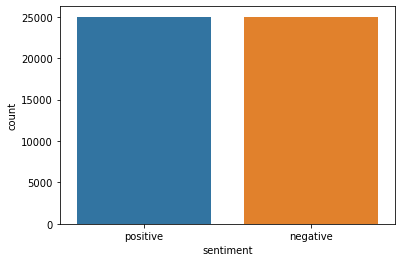

In [27]:
sns.countplot(x='sentiment', data=data)
print(data.sentiment.value_counts())

In [28]:
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=.4, shuffle=False)

In [30]:
# applying preprocessing functions
X_train = clean(X_train)
X_test = clean(X_test)

In [31]:
# converting sentiments into 0 and 1
y_train = y_train.apply(lambda x : 1 if x == 'positive' else 0)
y_test = y_test.apply(lambda x : 1 if x == 'positive' else 0)

In [32]:
# exporting resultant datasets
file_write(X_train, X_test, y_train, y_test)